![](https://www.thedrive.com/wp-content/uploads/2023/05/30/NissanAltimaCrash.gif?strip=all&quality=85)

#### importing and data loading  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/motor-vehicle-repair-and-towing/Motor_Vehicle_Repair_and_Towing.csv')

#### Initial Data Exploration


In [3]:
df.info()
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Registration Type          2432 non-null   object
 1   Corporation Name           1818 non-null   object
 2   Trade Name                 2428 non-null   object
 3   Business Address           2353 non-null   object
 4   Business Address2          116 non-null    object
 5   City                       2389 non-null   object
 6   State                      2389 non-null   object
 7   Zip                        1301 non-null   object
 8   Phone Number               2377 non-null   object
 9   # ASE Certified Mechanics  2432 non-null   int64 
 10  Tow Storage Address        248 non-null    object
 11  Tow Storage 2              12 non-null     object
 12  Tow Storage City           208 non-null    object
 13  Tow Storage State          207 non-null    object
 14  Tow Stor

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


### Data Cleaning and Preparation: Handling Dates


I convert the 'Issue Date' and 'Expiration' columns from object (text) type to proper datetime objects using pd.to_datetime

In [4]:
df['Issue Date'] = pd.to_datetime(df['Issue Date'], errors='coerce')
df['Expiration'] = pd.to_datetime(df['Expiration'], errors='coerce')

df = df.dropna(subset=['Issue Date', 'Expiration'])

### Registration Type Distribution


analyze the frequency of different business registration types. value_counts() is an efficient pandas method that counts the occurrences of each unique value in the 'Registration Type' column. 

In [5]:
reg_type_counts = df['Registration Type'].value_counts()
print("\n--- Registration Type Distribution ---")
print(reg_type_counts)


--- Registration Type Distribution ---
Registration Type
Corporation            1818
Sole Proprietorship     555
Partnership              59
Name: count, dtype: int64


### ASE Certified Mechanics


In [6]:
ase_mechanics_col = '# ASE Certified Mechanics'
print(f"\n Analysis of '{ase_mechanics_col}' ")
print(df[ase_mechanics_col].describe())

has_ase_mechanics = (df[ase_mechanics_col] > 0).value_counts()
print("\nBusinesses with >0 ASE Certified Mechanics:")
print(f"Yes: {has_ase_mechanics.get(True, 0)}")
print(f"No: {has_ase_mechanics.get(False, 0)}")


 Analysis of '# ASE Certified Mechanics' 
count    2432.000000
mean        0.372944
std         1.306053
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        25.000000
Name: # ASE Certified Mechanics, dtype: float64

Businesses with >0 ASE Certified Mechanics:
Yes: 457
No: 1975


### Geographical Distribution (Top Cities)
To understand the geographical concentration of these businesses, i analyze the 'City' column

In [7]:
city_counts = df['City'].dropna().value_counts().head(15)
print("\n Top 15 Cities by Registration Count ")
print(city_counts)


 Top 15 Cities by Registration Count 
City
Rockville        725
Gaithersburg     506
Silver Spring    407
Germantown       120
Kensington       104
Bethesda          98
Wheaton           58
Damascus          33
Takoma Park       26
Burtonsville      17
Beltsville        15
Laurel            15
Olney             15
Derwood           14
ROCKVILLE         12
Name: count, dtype: int64


### Registration Duration
calculate the duration of each registration in days.



In [8]:
df['Registration Duration (days)'] = (df['Expiration'] - df['Issue Date']).dt.days
print("\n Registration Duration Statistics (days) ")
print(df[df['Registration Duration (days)'] >= 0]['Registration Duration (days)'].describe())


 Registration Duration Statistics (days) 
count    2428.000000
mean      888.758649
std       357.538679
min         0.000000
25%       366.000000
50%      1096.000000
75%      1096.000000
max      4324.000000
Name: Registration Duration (days), dtype: float64


### Registrations Expiring Soon
This analysis identifies registrations that are nearing their expiration date, which could be useful for administrative purposes.

In [9]:
reference_date = df['Issue Date'].max()
ninety_days_later = reference_date + pd.Timedelta(days=90)

expiring_soon_mask = (df['Expiration'] > reference_date) & (df['Expiration'] <= ninety_days_later)
expiring_soon_df = df[expiring_soon_mask]

print(f"\n Registrations Expiring Between {reference_date.date()} and {ninety_days_later.date()} ")
print(f"Number expiring soon: {len(expiring_soon_df)}")
print(expiring_soon_df[['Corporation Name', 'Trade Name', 'Expiration']].head())


 Registrations Expiring Between 2026-01-17 and 2026-04-17 
Number expiring soon: 57
                   Corporation Name                     Trade Name Expiration
51            Alex Auto Repairs LLC          Alex Auto Repairs LLC 2026-01-24
62   Pegasus Towing & Transport LLC  Pegasus Towing &Transport LLC 2026-01-23
73   Criswell Performance Cars, Inc   Criswell Chrysler Jeep Dodge 2026-01-27
132            AMPM Automotive, LLC           AMPM Automotive, LLC 2026-02-21
133      Ultimate Dealer Group, LLC       Flemings Ultimate Garage 2026-02-27


### Visualization Setup


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


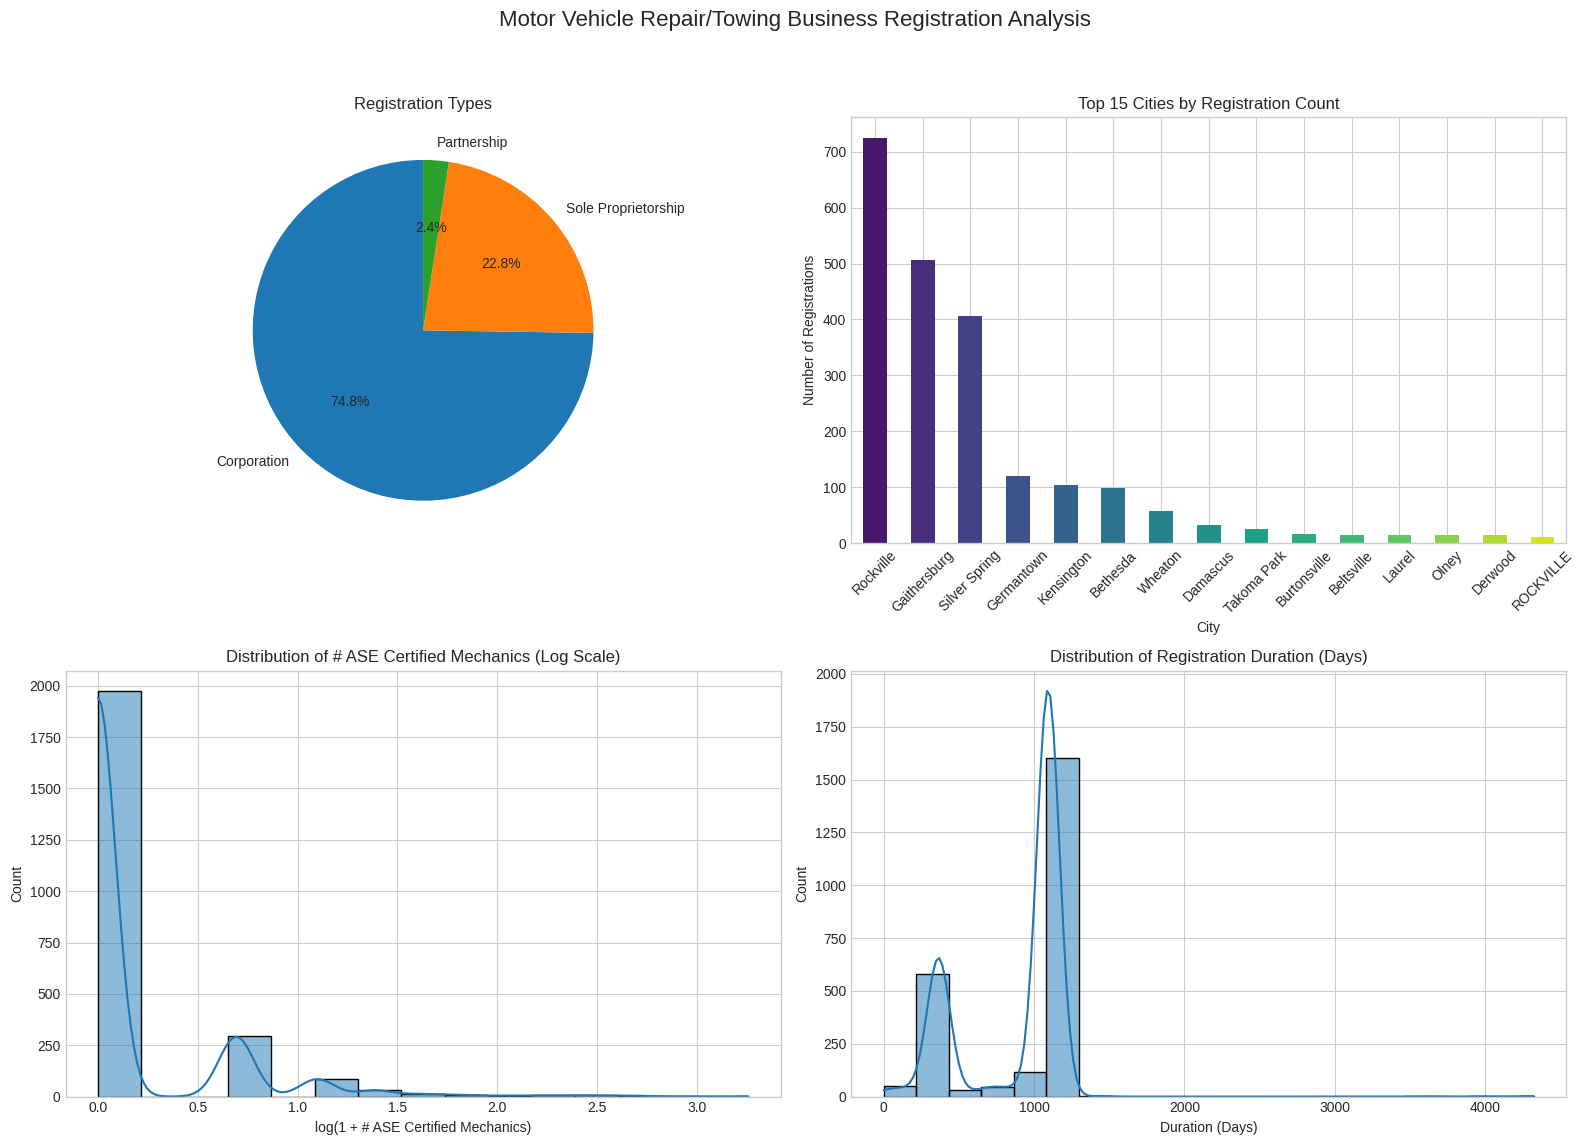

In [10]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Motor Vehicle Repair/Towing Business Registration Analysis', fontsize=16)


reg_type_counts.plot(kind='pie', ax=axes[0, 0], autopct='%1.1f%%', startangle=90, title='Registration Types')
axes[0, 0].set_ylabel('')


city_counts.plot(kind='bar', ax=axes[0, 1], title='Top 15 Cities by Registration Count', color=sns.color_palette('viridis', len(city_counts)))
axes[0, 1].set_xlabel('City')
axes[0, 1].set_ylabel('Number of Registrations')
axes[0, 1].tick_params(axis='x', rotation=45)


mechanics_data = df[ase_mechanics_col]
mechanics_data_positive = mechanics_data[mechanics_data >= 0]
sns.histplot(np.log1p(mechanics_data_positive), kde=True, ax=axes[1, 0], bins=15)
axes[1, 0].set_title('Distribution of # ASE Certified Mechanics (Log Scale)')
axes[1, 0].set_xlabel('log(1 + # ASE Certified Mechanics)')


duration_data = df[df['Registration Duration (days)'] >= 0]['Registration Duration (days)']
sns.histplot(duration_data, kde=True, ax=axes[1, 1], bins=20)
axes[1, 1].set_title('Distribution of Registration Duration (Days)')
axes[1, 1].set_xlabel('Duration (Days)')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

🔻🔻🔻 The current dataset only contains information about the companies' licenses and registration details. It's like trying to predict how well a student will do on a specific exam using only their school's address and founding date — you're missing essential information about the student's study habits, previous grades, and the exam content itself.Therefore, I chose to focus on the EDA of the registration details.